<a href="https://colab.research.google.com/github/npallab/genai_with_huggingface/blob/main/HuggingFace_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚀 LangChain Pipelines: Modular LLM Applications**
This notebook serves as a practical introduction to building applications with LangChain. We will move beyond simple single-prompt interactions to construct sophisticated LLM pipelines using the Chain abstraction. By the end of this session, you will understand how to connect components—like Prompt Templates, Language Models, and Output Parsers—into a cohesive, robust workflow. This modular approach is essential for developing complex, production-ready applications like advanced Q&A systems and autonomous agents.

Step 1 : Installing the Huggingface Libraries

In [ ]:
!pip install huggingface

In [ ]:
!pip install langchain_community

Step 2 : Imporintg the necessary Dependencies

In [3]:
from langchain_community.llms import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

*In this example we will build a Pipeline for GPT2 Model, first we will initialize a varibale with the model name*

In [4]:
model='gpt2'

In [5]:
tokenizer=AutoTokenizer.from_pretrained(model) # initializing the pretrained tokenizer

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [6]:
model=AutoModelForCausalLM.from_pretrained(model) #Downloading the GPT2 Model Locally

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [7]:
pipe=pipeline('text-generation',model=model,tokenizer=tokenizer,max_length=100) #Initializing the Pipeline

Device set to use cpu


In [8]:
from langchain_core.prompts import PromptTemplate # Importing Prompt Template

In [9]:
prompt_text = """ You are a simple question answer bot, think strategetically about {question} and answer in brief"""

In [10]:
prompt_main=PromptTemplate.from_template(prompt_text) #Initializing the Prompt Template

In [11]:
llm=HuggingFacePipeline(pipeline=pipe) #Initializing the HuggingFace Pipeline

/tmp/ipython-input-2500142245.py:1: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFacePipeline``.
  llm=HuggingFacePipeline(pipeline=pipe) #Initializing the HuggingFace Pipeline


In [12]:
llm_fin= prompt_main | llm

Now our local LLM is ready for being called, we can call the LLM by using invoke method

In [13]:
question="what is data science ?" #A simple question for the LLM

In [14]:
ans=llm.invoke(question) #Calling the LLM

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [15]:
print(ans)

what is data science ?

Data science is the study of the world's data. It is the study of data, to be sure, but it also includes all kinds of other things. There are no laws to govern it. Every time you


Trying with another Question :

In [16]:
question_2="Answer in a single word, what the current population of the world"

In [17]:
ans=llm.invoke(question_2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [18]:
print(ans)

Answer in a single word, what the current population of the world is.

The numbers are not a straight line.

The numbers are a list of the possible sizes of the world.

The numbers are a list of the possible


## ☁️ Introduction to Hugging Face Inference Providers

Moving beyond local model deployment, **Hugging Face Inference Providers** offer a streamlined, cloud-based solution for accessing and running powerful **Large Language Models (LLMs)** and other AI models.

Essentially, Hugging Face acts as a **unified proxy layer**. It integrates with several world-class third-party inference partners (such as Together AI, Replicate, and Fal.ai) to offer a consistent and reliable API. This means you don't have to manage multiple accounts or learn different API structures. You use a single client, the **`InferenceClient`**, authenticated simply by your **Hugging Face User Access Token (`HF_TOKEN`)**, to execute inference tasks against various models hosted by these external providers.

This approach simplifies the process of testing, switching, and scaling your use of state-of-the-art models without the complexity of direct provider management.

---

## 🛠️ Next Section: Working with Hugging Face Inference Providers

In the following section, we will practically apply this concept. We will:

1.  Securely load the required **`HF_TOKEN`** from Colab Secrets.
2.  Instantiate the **`InferenceClient`**.
3.  Demonstrate how to run a basic **text generation task** on a high-capacity model, leveraging the power of these external providers with just a few lines of code.

The first Inference Example is a Text Classification

In [19]:
from google.colab import userdata
import os

os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN") # Importing the Secret API Key from Colab Secrets

In [20]:
import os
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="hf-inference",
    api_key=os.environ["HF_TOKEN"],
)

result = client.text_classification(
    "I like you. I love you",
    model="ProsusAI/finbert",
)

In [21]:
print(result)

[TextClassificationOutputElement(label='neutral', score=0.8907914757728577), TextClassificationOutputElement(label='positive', score=0.08782878518104553), TextClassificationOutputElement(label='negative', score=0.02137971669435501)]


Testing another Question

In [22]:
question_3="I hate everything, I am very sad"

In [23]:
result=client.text_classification(question_3,model="ProsusAI/finbert")

In [24]:
print(result)

[TextClassificationOutputElement(label='negative', score=0.5886944532394409), TextClassificationOutputElement(label='neutral', score=0.38151639699935913), TextClassificationOutputElement(label='positive', score=0.029789196327328682)]


# 🖼️ Image Generation with Hugging Face Inference Providers
Hugging Face Inference Providers extend beyond text and allow for seamless image generation using state-of-the-art diffusion models like Stable Diffusion. By leveraging the InferenceClient, you can send a simple text prompt to a provider endpoint, which then handles the computationally intensive task of generating a high-quality image. This capability democratizes access to powerful generative AI, as the underlying heavy processing is managed by the external partner. All you need is your authenticated HF_TOKEN and a call to the client's text_to_image method, enabling you to integrate powerful, model-agnostic image creation directly into your application pipeline.

In [29]:
import os
from huggingface_hub import InferenceClient

client = InferenceClient(
    provider="nscale",
    api_key=os.environ["HF_TOKEN"],
)

# output is a PIL.Image object
image = client.text_to_image(
    "Astronaut riding a horse",
    model="stabilityai/stable-diffusion-xl-base-1.0", #using a different model this time
)

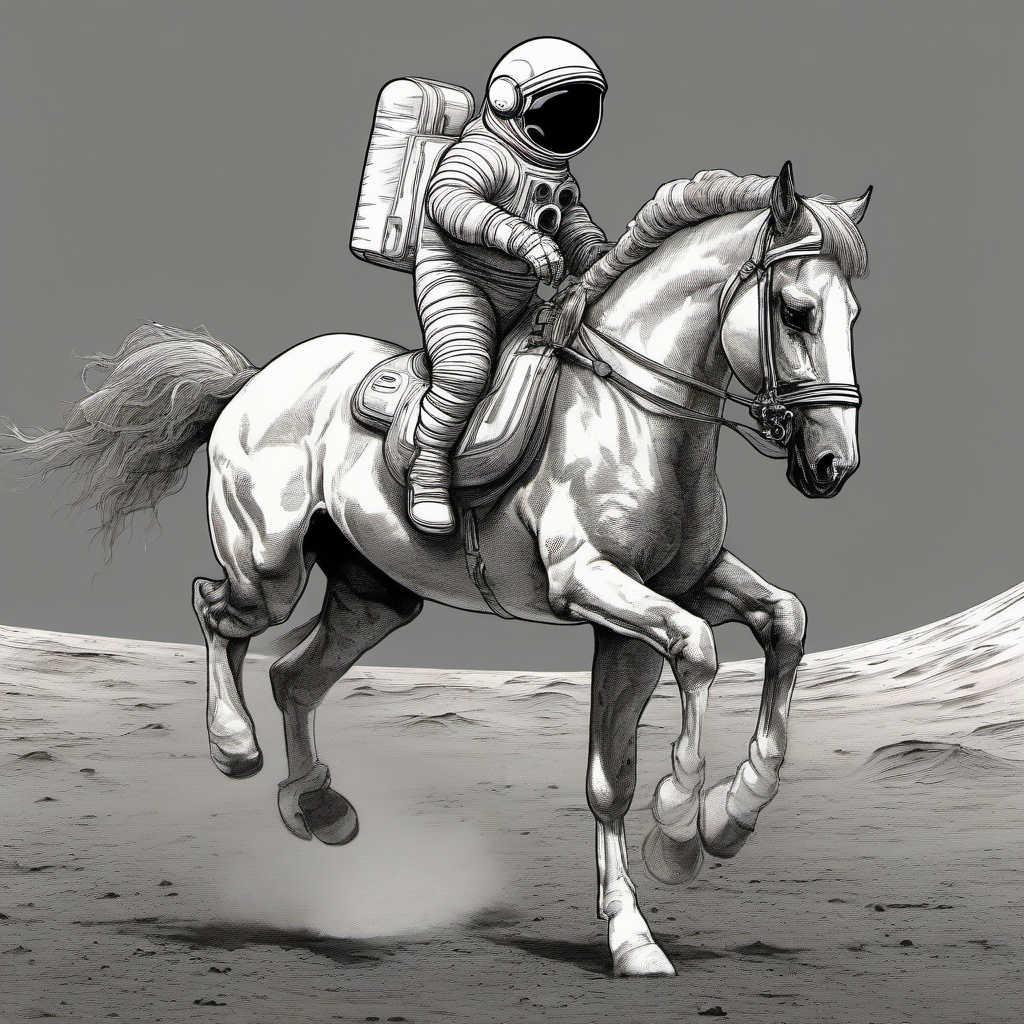

In [30]:
display(image)

Generating Another Image from the Prompt : *"A captivating portrait of a young woman with a serene expression, surrounded by soft, ethereal light. Her features are harmonious, and her hair flows gently. The background is a subtly blurred garden at dusk, adding to a dreamlike atmosphere. Photorealistic, high detail,*

In [32]:
prompt_image="A captivating portrait of a young woman with a serene expression, surrounded by soft, ethereal light. Her features are harmonious, and her hair flows gently. The background is a subtly blurred garden at dusk, adding to a dreamlike atmosphere. Photorealistic, high detail"

In [36]:
image = client.text_to_image(
    prompt_image,
    model="stabilityai/stable-diffusion-xl-base-1.0",
)

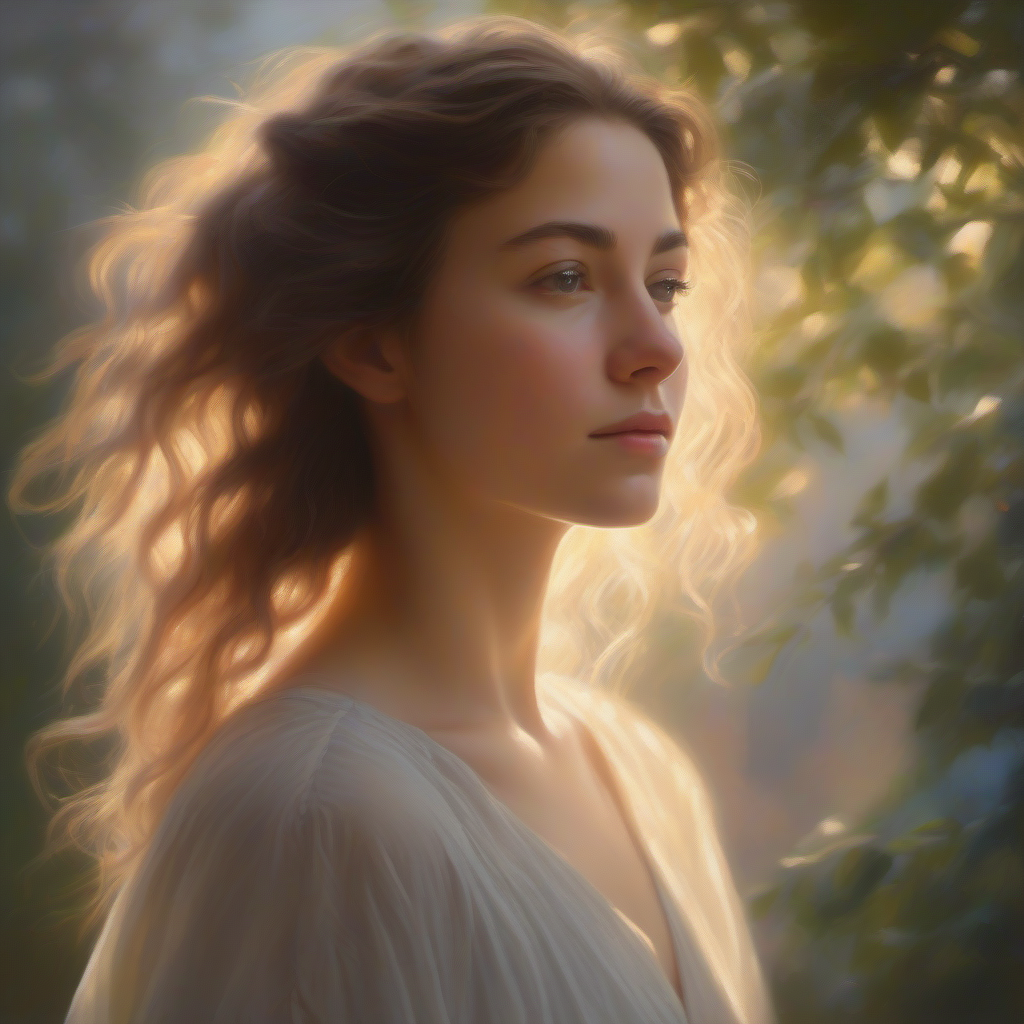

In [37]:
display(image)

# ⚠️ Caveat: How to Get Your Hugging Face Access Token
Before running the code, you need to obtain your personal Hugging Face User Access Token. This token serves as your API key for authentication and billing with the Inference Providers.

**Here is the step-by-step process:**

* Log In/Sign Up: Go to the Hugging Face Hub and log in to your account (or



create a new one).

* Navigate to Settings: Click on your Profile Picture in the top right corner and select "Settings".

* Access Tokens: In the sidebar menu, click on "Access Tokens" (or "API Keys").

* Create New Token: Click the "New token" button.

* Name: Give it a clear name (e.g., Colab-Inference).

* Role: Select the read role if you only plan to run models (like the examples in this notebook). Select write only if you intend to upload models or datasets.

* Copy Securely: Click "Generate a token". Copy the resulting token immediately. This is the only time the full token string will be visible.

❗️ Security Note: Treat your HF_TOKEN like a password. Never hardcode it directly into your notebook. We use the secure Colab Secrets feature to load the token as an environment variable (`HF_TOKEN`) for this very reason.